In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns
import scipy.stats as stats

In [3]:
df_dia = pd.read_csv('data/Patient_Diagnosis_Data.csv')
df_sur = pd.read_csv('data/Patient_Surgery_Data.csv')
df_ima = pd.read_csv('data/Medical_Image_Data_01.csv', encoding='euc-kr')

## 데이터 전처리

In [17]:
df = pd.merge(df_dia, df_sur, on = ['환자ID', '신장', '연령', '입원일자', '체중', '퇴원일자', '헤모글로빈수치', '환자통증정도', '통증기간(월)'])
df.head()

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,혈전합병증여부,환자통증정도,흡연여부,통증기간(월),수술기법,수술시간,수술실패여부,수술일자,재발여부,혈액형
0,1PT,22.8,3,51.0,0.0,0,0,0,0,0,...,0,10,0,1.0,TELD,68.0,0,20190715,0,RH+A
1,2PT,44.9,4,26.0,0.0,0,0,0,0,0,...,0,10,0,1.0,TELD,31.0,0,20190716,0,RH+A
2,3PT,53.0,3,NaN,0.0,0,0,1,0,0,...,0,7,0,1.0,TELD,78.0,0,20190731,0,RH+B
3,4PT,54.7,4,18.0,0.0,0,1,0,0,0,...,0,7,0,2.0,TELD,73.0,0,20190802,0,RH+O
4,5PT,53.8,4,NaN,0.0,0,1,0,0,0,...,0,7,0,1.0,TELD,29.0,0,20190906,0,RH+A


In [20]:
print(df_dia.shape)
print(df_sur.shape)
print(df.shape)

(1894, 30)
(1894, 15)
(1894, 36)


In [21]:
df = pd.merge(df, df_ima, on = '환자ID')
df.head()

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,1PT,22.8,3,51.0,0.0,0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
1,2PT,44.9,4,26.0,0.0,0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
2,3PT,53.0,3,NaN,0.0,0,0,1,0,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
3,4PT,54.7,4,18.0,0.0,0,1,0,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
4,5PT,53.8,4,NaN,0.0,0,1,0,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0


In [24]:
df.to_csv('data/df.csv', index = False)

In [110]:
df = pd.read_csv('data/df.csv')
df.head()

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,1PT,22.8,3,51.0,0.0,0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
1,2PT,44.9,4,26.0,0.0,0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
2,3PT,53.0,3,NaN,0.0,0,0,1,0,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
3,4PT,54.7,4,18.0,0.0,0,1,0,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
4,5PT,53.8,4,NaN,0.0,0,1,0,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0


In [111]:
df.drop(columns = 'ODI', inplace = True)

In [112]:
df['가족력'].fillna(0, inplace = True)

In [113]:
df['헤모글로빈수치'].fillna(df['헤모글로빈수치'].mean(), inplace = True)

In [114]:
df['통증기간(월)'].fillna(1, inplace = True)

In [115]:
df['수술기법'].fillna('TELD', inplace = True)

In [116]:
df['수술시간'].fillna(df['수술시간'].mean(), inplace = True)

In [117]:
df.drop(index = df.loc[df['지방축적도'].isnull()].index, inplace = True)

In [118]:
df.drop(index = df.loc[df['PI'].isnull()].index, inplace = True)

In [119]:
df.drop(index = df.loc[df['PT'].isnull()].index, inplace = True)

In [120]:
df.drop(index = df.loc[df['Seg Angle(raw)'].isnull()].index, inplace = True)

In [121]:
df.drop(index = df.loc[df['디스크단면적'].isnull()].index, inplace = True)

In [128]:
df.isnull().sum()

환자ID                        0
Large Lymphocyte            0
Location of herniation      0
가족력                         0
간질성폐질환                      0
고혈압여부                       0
과거수술횟수                      0
당뇨여부                        0
말초동맥질환여부                    0
빈혈여부                        0
성별                          0
스테로이드치료                     0
신부전여부                       0
신장                          0
심혈관질환                       0
암발병여부                       0
연령                          0
우울증여부                       0
입원기간                        0
입원일자                        0
종양진행여부                      0
직업                        412
체중                          0
퇴원일자                        0
헤모글로빈수치                     0
혈전합병증여부                     0
환자통증정도                      0
흡연여부                        0
통증기간(월)                     0
수술기법                        0
수술시간                        0
수술실패여부                      0
수술일자                        0
재발여부      

In [123]:
def get_agerange(age):
    return str(age)[0] + '0대'
    
df['연령대'] = df['연령'].apply(get_agerange)

In [124]:
df['연령대'].value_counts()

40대    579
30대    467
20대    320
50대    272
60대    115
10대     68
70대     59
80대      5
Name: 연령대, dtype: int64

In [97]:
age1020 = df.loc[(df['연령대'] == '10대') | (df['연령대'] == '20대')].index.tolist()
age1020

[38,
 52,
 60,
 66,
 67,
 68,
 77,
 79,
 82,
 84,
 86,
 91,
 100,
 103,
 106,
 110,
 115,
 118,
 119,
 121,
 134,
 156,
 158,
 164,
 168,
 171,
 174,
 175,
 176,
 180,
 181,
 183,
 184,
 185,
 186,
 187,
 196,
 202,
 204,
 209,
 211,
 214,
 217,
 218,
 224,
 228,
 235,
 236,
 237,
 242,
 247,
 251,
 256,
 272,
 283,
 285,
 290,
 303,
 306,
 307,
 310,
 312,
 313,
 315,
 317,
 318,
 320,
 340,
 352,
 354,
 365,
 366,
 368,
 369,
 372,
 380,
 381,
 383,
 396,
 398,
 408,
 410,
 412,
 422,
 423,
 424,
 426,
 427,
 428,
 433,
 435,
 436,
 437,
 444,
 447,
 448,
 452,
 454,
 455,
 457,
 458,
 460,
 467,
 476,
 483,
 485,
 486,
 491,
 505,
 511,
 513,
 522,
 523,
 524,
 526,
 529,
 530,
 531,
 536,
 541,
 553,
 556,
 560,
 565,
 569,
 591,
 596,
 616,
 622,
 624,
 630,
 636,
 654,
 664,
 668,
 700,
 719,
 746,
 761,
 763,
 766,
 772,
 776,
 787,
 792,
 801,
 804,
 809,
 840,
 843,
 849,
 863,
 880,
 895,
 900,
 905,
 907,
 908,
 917,
 922,
 930,
 939,
 944,
 951,
 1003,
 1014,
 1019,
 1037,


In [140]:
df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', '가족력', '간질성폐질환',
       '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부',
       '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간', '입원일자', '종양진행여부', '직업',
       '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)', '수술기법',
       '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형', '전방디스크높이(mm)', '후방디스크높이(mm)',
       '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI', 'PT',
       'Seg Angle(raw)', 'Vaccum disc', '골밀도', '디스크단면적', '디스크위치', '척추이동척도',
       '척추전방위증', '연령대'],
      dtype='object')

In [141]:
pd.crosstab(df['연령대'], df['직업'])

직업,건설업,공무원,교사,군인,노동직,농업,무직,사무직,사업가,예술가,운동선수,운수업,의료직,자영업,주부,특수전문직,학생
연령대,,,,,,,,,,,,,,,,,
10대,0,0,0,12,0,0,0,0,0,0,1,0,0,0,0,0,52
20대,2,3,5,66,2,0,22,54,0,2,7,7,7,15,4,1,77
30대,7,13,4,6,11,2,27,213,7,5,4,25,19,31,28,8,5
40대,4,22,14,6,21,5,24,121,21,1,2,10,11,74,47,9,0
50대,4,11,5,0,6,23,31,51,8,2,0,6,2,34,22,5,0
60대,0,0,2,0,0,8,33,4,2,0,0,2,1,17,8,0,0
70대,0,2,0,0,2,2,23,2,1,0,0,0,0,0,3,0,0
80대,0,0,0,0,0,0,3,0,0,0,0,0,0,0,2,0,0


In [153]:
list1 = ['학생','학생','사무직','사무직','사무직','무직','무직','무직']
list2 = ['10대','20대','30대','40대','50대','60대','70대','80대']
dict1 = dict(zip(list2, list1))

In [163]:
cond1 = (df['직업'].isna())
df1_3 = df.loc[cond1]

In [165]:
def func1(data):
    return dict1[data]

df1_3['직업'] = df1_3['연령대'].apply(func1)

C:\Users\User\AppData\Local\Temp/ipykernel_284/3034090877.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_3['직업'] = df1_3['연령대'].apply(func1)


In [175]:
df

,환자ID,Large Lymphocyte,Location of herniation,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,연령대
0,1PT,22.8,3,0.0,0,0,0,0,0,0,...,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0,60대
1,2PT,44.9,4,0.0,0,0,0,0,0,0,...,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0,40대
2,3PT,53.0,3,0.0,0,0,1,0,0,0,...,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0,30대
3,4PT,54.7,4,0.0,0,1,0,0,0,0,...,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0,40대
4,5PT,53.8,4,0.0,0,1,0,0,0,0,...,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1890PT,44.0,1,0.0,0,0,0,0,0,0,...,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0,50대
1890,1891PT,30.8,2,0.0,0,0,0,0,0,0,...,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0,40대
1891,1892PT,36.7,3,0.0,0,0,0,0,1,0,...,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0,60대
1892,1893PT,32.5,2,0.0,0,0,0,0,0,0,...,32.2,11.1,17.7,0,NaN,1972.50,5,Down,0,20대


In [177]:
df_1 = pd.concat([df1_3,df.loc[~cond1]])
df_1

,환자ID,Large Lymphocyte,Location of herniation,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,연령대
7,8PT,43.8,4,0.0,0,0,0,0,0,0,...,50.6,18.5,10.7,0,-1.04,1830.58,4,Middle,0,50대
8,9PT,89.0,3,0.0,0,0,0,0,0,0,...,48.8,13.6,13.8,1,-1.33,2021.75,4,Down,0,50대
9,10PT,40.5,3,0.0,0,0,0,0,0,0,...,38.9,14.7,14.2,0,-2.51,2302.50,4,Middle,0,70대
10,11PT,31.8,3,0.0,0,0,0,0,0,0,...,58.6,33.9,18.8,0,-1.68,1678.80,4,Down,0,40대
12,13PT,20.3,3,0.0,0,0,0,0,0,0,...,42.9,21.3,9.1,0,-1.38,1915.80,4,Down,0,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1890PT,44.0,1,0.0,0,0,0,0,0,0,...,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0,50대
1890,1891PT,30.8,2,0.0,0,0,0,0,0,0,...,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0,40대
1891,1892PT,36.7,3,0.0,0,0,0,0,1,0,...,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0,60대
1892,1893PT,32.5,2,0.0,0,0,0,0,0,0,...,32.2,11.1,17.7,0,NaN,1972.50,5,Down,0,20대


In [203]:
df1 = df_1.sort_index()

In [204]:
df1

,환자ID,Large Lymphocyte,Location of herniation,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,연령대
0,1PT,22.8,3,0.0,0,0,0,0,0,0,...,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0,60대
1,2PT,44.9,4,0.0,0,0,0,0,0,0,...,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0,40대
2,3PT,53.0,3,0.0,0,0,1,0,0,0,...,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0,30대
3,4PT,54.7,4,0.0,0,1,0,0,0,0,...,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0,40대
4,5PT,53.8,4,0.0,0,1,0,0,0,0,...,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0,40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1890PT,44.0,1,0.0,0,0,0,0,0,0,...,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0,50대
1890,1891PT,30.8,2,0.0,0,0,0,0,0,0,...,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0,40대
1891,1892PT,36.7,3,0.0,0,0,0,0,1,0,...,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0,60대
1892,1893PT,32.5,2,0.0,0,0,0,0,0,0,...,32.2,11.1,17.7,0,NaN,1972.50,5,Down,0,20대


In [205]:
df1.isnull().sum()

환자ID                        0
Large Lymphocyte            0
Location of herniation      0
가족력                         0
간질성폐질환                      0
고혈압여부                       0
과거수술횟수                      0
당뇨여부                        0
말초동맥질환여부                    0
빈혈여부                        0
성별                          0
스테로이드치료                     0
신부전여부                       0
신장                          0
심혈관질환                       0
암발병여부                       0
연령                          0
우울증여부                       0
입원기간                        0
입원일자                        0
종양진행여부                      0
직업                          0
체중                          0
퇴원일자                        0
헤모글로빈수치                     0
혈전합병증여부                     0
환자통증정도                      0
흡연여부                        0
통증기간(월)                     0
수술기법                        0
수술시간                        0
수술실패여부                      0
수술일자                        0
재발여부      

<AxesSubplot:title={'center':'골밀도'}, xlabel='[수술실패여부]'>

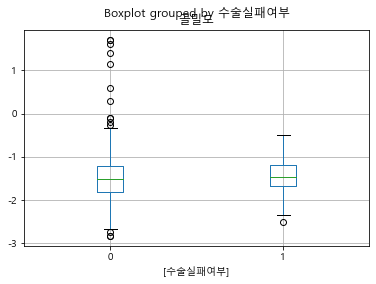

In [207]:
df1.boxplot(column = '골밀도', by = ['수술실패여부'])

<AxesSubplot:title={'center':'골밀도'}, xlabel='[재발여부]'>

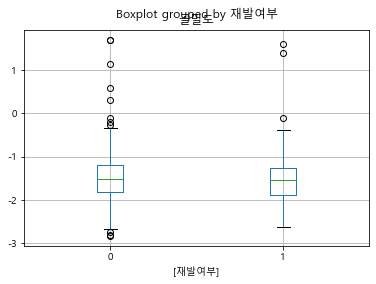

In [208]:
df1.boxplot(column = '골밀도', by = ['재발여부'])

In [210]:
df_gol = df1.dropna(axis = 0)

In [211]:
df_gol_0 = df_gol.loc[df_gol['수술실패여부'] == 0, '골밀도']
df_gol_1 = df_gol.loc[df_gol['수술실패여부'] == 1, '골밀도']


In [212]:
stats.mannwhitneyu(df_gol_0, df_gol_1)

MannwhitneyuResult(statistic=25193.0, pvalue=0.1940457761502946)

In [213]:
df_gol_0 = df_gol.loc[df_gol['재발여부'] == 0, '골밀도']
df_gol_1 = df_gol.loc[df_gol['재발여부'] == 1, '골밀도']


In [214]:
stats.mannwhitneyu(df_gol_0, df_gol_1)

MannwhitneyuResult(statistic=57739.5, pvalue=0.3625726579931394)

In [215]:
# df_nan :결측치 처리 끝낸 데이터프레임
df_nan = df1.drop(columns = '골밀도')
df_nan.head()

,환자ID,Large Lymphocyte,Location of herniation,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,디스크단면적,디스크위치,척추이동척도,척추전방위증,연령대
0,1PT,22.8,3,0.0,0,0,0,0,0,0,...,3,51.6,36.6,14.4,0,2048.50,4,Down,0,60대
1,2PT,44.9,4,0.0,0,0,0,0,0,0,...,0,40.8,7.2,17.8,0,1753.10,4,Up,0,40대
2,3PT,53.0,3,0.0,0,0,1,0,0,0,...,0,67.5,27.3,10.2,0,1749.00,4,Down,0,30대
3,4PT,54.7,4,0.0,0,1,0,0,0,0,...,0,49.2,18.7,19.9,0,1796.20,4,Down,0,40대
4,5PT,53.8,4,0.0,0,1,0,0,0,0,...,0,58.8,14.7,5.2,0,2021.48,4,Up,0,40대


In [217]:
df_nan.to_csv('data/df_nan.csv', index = False)

In [218]:
df1.to_csv('data/df1.csv', index = False)

In [219]:
df_nan.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', '가족력', '간질성폐질환',
       '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부',
       '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간', '입원일자', '종양진행여부', '직업',
       '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)', '수술기법',
       '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형', '전방디스크높이(mm)', '후방디스크높이(mm)',
       '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI', 'PT',
       'Seg Angle(raw)', 'Vaccum disc', '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증',
       '연령대'],
      dtype='object')

In [220]:
df_nan['BMI'] = df_nan['체중'] / ((df_nan['신장']*0.01)**2)

In [224]:
df_nan['디스크높이차(mm)'] = (df_nan['전방디스크높이(mm)'] - df_nan['후방디스크높이(mm)'])

In [225]:
df_nan[['전방디스크높이(mm)', '후방디스크높이(mm)', '디스크높이차(mm)']]

,전방디스크높이(mm),후방디스크높이(mm),디스크높이차(mm)
0,16.1,12.3,3.8
1,13.7,6.4,7.3
2,13.6,7.4,6.2
3,10.6,7.3,3.3
4,17.1,8.1,9.0
...,...,...,...
1889,17.0,10.7,6.3
1890,9.4,8.2,1.2
1891,13.5,5.5,8.0
1892,14.0,10.0,4.0


In [ ]:
def get_BMI_range(BMI):
    

In [226]:
df_nan.loc[df_nan['BMI'] < 18.5, '비만정도'] = '저체중'
df_nan.loc[(df_nan['BMI'] >= 18.5) & (df_nan['BMI'] < 23), '비만정도'] = '정상'
df_nan.loc[(df_nan['BMI'] >= 23) & (df_nan['BMI'] < 25), '비만정도'] = '과체중'
df_nan.loc[(df_nan['BMI'] >= 25) & (df_nan['BMI'] < 30), '비만정도'] = '경도비만'
df_nan.loc[(df_nan['BMI'] >= 30) & (df_nan['BMI'] < 35), '비만정도'] = '중등도비만'
df_nan.loc[(df_nan['BMI'] >= 35), '비만정도'] = '고도비만'


In [227]:
df_nan[['BMI', '비만정도']]

,BMI,비만정도
0,22.695623,정상
1,24.520365,과체중
2,24.334049,과체중
3,24.507861,과체중
4,24.097465,과체중
...,...,...
1889,25.964542,경도비만
1890,23.936062,과체중
1891,25.099502,경도비만
1892,24.577867,과체중


In [228]:
df_nan.to_csv('data/df_all.csv', index = False)

## EDA: 탐색적 데이터 분석

In [230]:
df = pd.read_csv('data/df_all.csv')
df

,환자ID,Large Lymphocyte,Location of herniation,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,Seg Angle(raw),Vaccum disc,디스크단면적,디스크위치,척추이동척도,척추전방위증,연령대,BMI,디스크높이차(mm),비만정도
0,1PT,22.8,3,0.0,0,0,0,0,0,0,...,14.4,0,2048.50,4,Down,0,60대,22.695623,3.8,정상
1,2PT,44.9,4,0.0,0,0,0,0,0,0,...,17.8,0,1753.10,4,Up,0,40대,24.520365,7.3,과체중
2,3PT,53.0,3,0.0,0,0,1,0,0,0,...,10.2,0,1749.00,4,Down,0,30대,24.334049,6.2,과체중
3,4PT,54.7,4,0.0,0,1,0,0,0,0,...,19.9,0,1796.20,4,Down,0,40대,24.507861,3.3,과체중
4,5PT,53.8,4,0.0,0,1,0,0,0,0,...,5.2,0,2021.48,4,Up,0,40대,24.097465,9.0,과체중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1890PT,44.0,1,0.0,0,0,0,0,0,0,...,21.8,0,2652.20,5,Middle,0,50대,25.964542,6.3,경도비만
1881,1891PT,30.8,2,0.0,0,0,0,0,0,0,...,5.0,0,1795.80,4,Down,0,40대,23.936062,1.2,과체중
1882,1892PT,36.7,3,0.0,0,0,0,0,1,0,...,17.4,1,2624.40,4,Down,0,60대,25.099502,8.0,경도비만
1883,1893PT,32.5,2,0.0,0,0,0,0,0,0,...,17.7,0,1972.50,5,Down,0,20대,24.577867,4.0,과체중


In [242]:
df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', '가족력', '간질성폐질환',
       '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부',
       '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간', '입원일자', '종양진행여부', '직업',
       '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)', '수술기법',
       '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형', '전방디스크높이(mm)', '후방디스크높이(mm)',
       '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI', 'PT',
       'Seg Angle(raw)', 'Vaccum disc', '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증',
       '연령대', 'BMI', '디스크높이차(mm)', '비만정도', '입원일자(dt)'],
      dtype='object')

In [247]:
df['입원일자(dt)'] = pd.to_datetime(df['입원일자'], format = '%Y%m%d')

In [248]:
df['입원연도'] = df['입원일자(dt)'].dt.year
df['입원월'] = df['입원일자(dt)'].dt.month
df['입원일'] = df['입원일자(dt)'].dt.day
df['입원요일'] = df['입원일자(dt)'].dt.day_name()

In [249]:
df[['입원일자', '입원일자(dt)', '입원연도', '입원월', '입원일', '입원요일']]

,입원일자,입원일자(dt),입원연도,입원월,입원일,입원요일
0,20190713,2019-07-13,2019,7,13,Saturday
1,20190715,2019-07-15,2019,7,15,Monday
2,20190729,2019-07-29,2019,7,29,Monday
3,20190731,2019-07-31,2019,7,31,Wednesday
4,20190903,2019-09-03,2019,9,3,Tuesday
...,...,...,...,...,...,...
1880,20170407,2017-04-07,2017,4,7,Friday
1881,20170426,2017-04-26,2017,4,26,Wednesday
1882,20170410,2017-04-10,2017,4,10,Monday
1883,20170408,2017-04-08,2017,4,8,Saturday


In [262]:
df.groupby('입원연도').count()

,환자ID,Large Lymphocyte,Location of herniation,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,척추이동척도,척추전방위증,연령대,BMI,디스크높이차(mm),비만정도,입원일자(dt),입원월,입원일,입원요일
입원연도,,,,,,,,,,,,,,,,,,,,,
2009,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2010,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
2011,202,202,202,202,202,202,202,202,202,202,...,202,202,202,202,202,202,202,202,202,202
2012,148,148,148,148,148,148,148,148,148,148,...,148,148,148,148,148,148,148,148,148,148
2013,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68
2014,97,97,97,97,97,97,97,97,97,97,...,97,97,97,97,97,97,97,97,97,97
2015,74,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
2016,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2017,78,78,78,78,78,78,78,78,78,78,...,78,78,78,78,78,78,78,78,78,78


In [286]:
df.groupby('수술연도').count()

,환자ID,Large Lymphocyte,Location of herniation,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,입원요일,수술일자(dt),수술월,수술일,수술요일,퇴원일자(dt),퇴원연도,퇴원월,퇴원일,퇴원요일
수술연도,,,,,,,,,,,,,,,,,,,,,
2009,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2010,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
2011,202,202,202,202,202,202,202,202,202,202,...,202,202,202,202,202,202,202,202,202,202
2012,148,148,148,148,148,148,148,148,148,148,...,148,148,148,148,148,148,148,148,148,148
2013,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68
2014,97,97,97,97,97,97,97,97,97,97,...,97,97,97,97,97,97,97,97,97,97
2015,74,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
2016,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2017,78,78,78,78,78,78,78,78,78,78,...,78,78,78,78,78,78,78,78,78,78


<AxesSubplot:xlabel='입원연도', ylabel='count'>

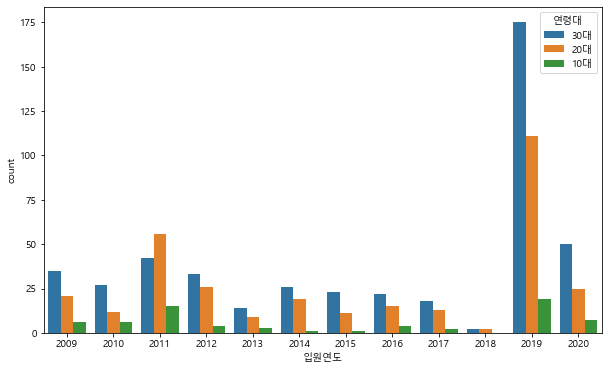

In [257]:
plt.figure(figsize = (10, 6))
sns.countplot(data = df.loc[(df['연령대'] == '10대') | (df['연령대'] == '20대') | (df['연령대'] == '30대')], x = '입원연도', hue = '연령대')

<AxesSubplot:xlabel='입원연도', ylabel='count'>

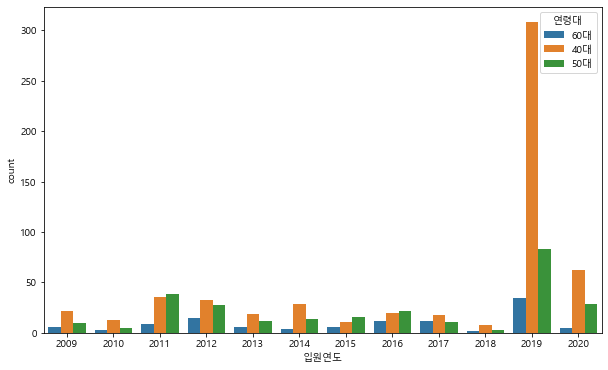

In [258]:
plt.figure(figsize = (10, 6))
sns.countplot(data = df.loc[(df['연령대'] == '40대') | (df['연령대'] == '50대') | (df['연령대'] == '60대')], x = '입원연도', hue = '연령대')

<AxesSubplot:xlabel='입원연도', ylabel='count'>

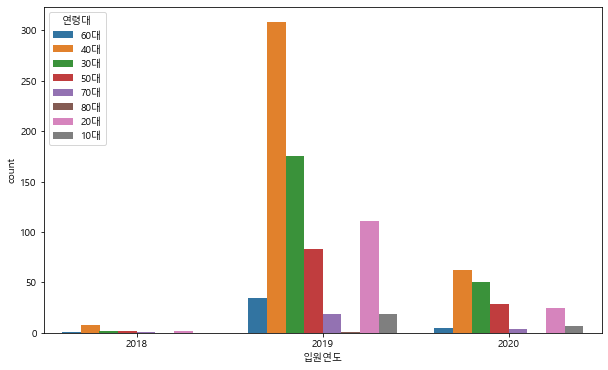

In [293]:
plt.figure(figsize = (10, 6))
sns.countplot(data = df.loc[(df['수술연도'] == 2019) | (df['수술연도'] == 2020)], x = '입원연도', hue = '연령대')

<AxesSubplot:xlabel='수술연도', ylabel='count'>

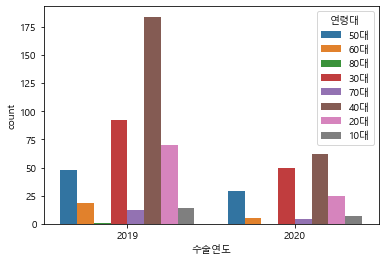

In [303]:
cond1 = (df['수술연도'] == 2019) & (df['수술월'] <= 5)
sns.countplot(data = df.loc[(cond1) | (df['수술연도'] == 2020)], x = '수술연도',  hue = '연령대')

In [301]:
df.loc[(cond1) | (df['수술연도'] == 2020)]['수술연도'].value_counts()

2019    440
2020    182
Name: 수술연도, dtype: int64

<AxesSubplot:xlabel='연령대', ylabel='count'>

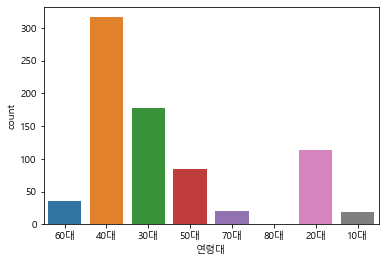

In [289]:
sns.countplot(data = df.loc[df['수술연도'] == 2019], x = '연령대')

<AxesSubplot:xlabel='수술요일', ylabel='count'>

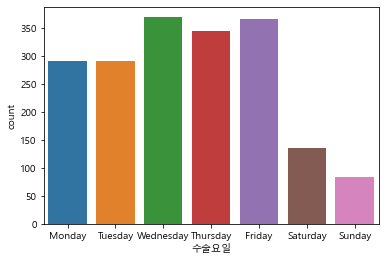

In [753]:
sns.countplot(data = df, x = '수술요일', order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

<AxesSubplot:xlabel='입원월', ylabel='count'>

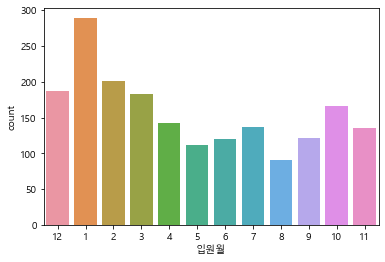

In [752]:
sns.countplot(data = df, x = '입원월', order = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

<AxesSubplot:xlabel='직업', ylabel='count'>

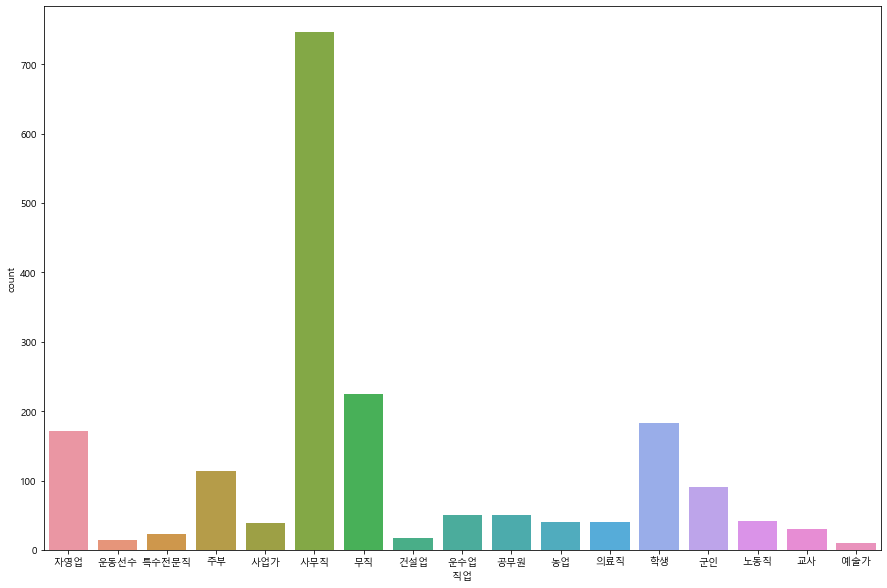

In [751]:
plt.figure(figsize = (15, 10))
sns.countplot(data = df, x = '직업')

In [267]:
df['입원기간'].mean()

1.7379310344827585

In [268]:
df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', '가족력', '간질성폐질환',
       '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부',
       '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간', '입원일자', '종양진행여부', '직업',
       '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)', '수술기법',
       '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형', '전방디스크높이(mm)', '후방디스크높이(mm)',
       '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI', 'PT',
       'Seg Angle(raw)', 'Vaccum disc', '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증',
       '연령대', 'BMI', '디스크높이차(mm)', '비만정도', '입원일자(dt)', '입원연도', '입원월', '입원일',
       '입원요일'],
      dtype='object')

In [269]:
df['수술일자(dt)'] = pd.to_datetime(df['수술일자'], format = '%Y%m%d')
df['수술연도'] = df['수술일자(dt)'].dt.year
df['수술월'] = df['수술일자(dt)'].dt.month
df['수술일'] = df['수술일자(dt)'].dt.day
df['수술요일'] = df['수술일자(dt)'].dt.day_name()

In [270]:
df['퇴원일자(dt)'] = pd.to_datetime(df['퇴원일자'], format = '%Y%m%d')
df['퇴원연도'] = df['퇴원일자(dt)'].dt.year
df['퇴원월'] = df['퇴원일자(dt)'].dt.month
df['퇴원일'] = df['퇴원일자(dt)'].dt.day
df['퇴원요일'] = df['퇴원일자(dt)'].dt.day_name()

In [524]:
df['입원일수'] = (df['퇴원일자(dt)'] - df['입원일자(dt)'])

In [528]:
def get_days(dt):
    return str(dt).split()[0]

df['입원일수'] =  df['입원일수'].apply(get_days)
df['입원일수'] = df['입원일수'].astype(int)

In [529]:
df['입원일수'].unique()

array([    3,     1,     4,     2,     5,     0,     8,   101,    11,
          15,    10,   217, -2059, -1464, -1009, -1038,    98,   244,
        -868,  -901, -1951,  -993,   -85, -1925,    29,    -6,   173,
       -1049,   757,  -383, -1829,    50,  -181,  1125, -1887,    65,
         177,   259,  -730, -2116,  -803,  -600,    92, -2155,   318,
        -370,   674,   398,  -546, -1596,   162,  -471,    31,    55,
           6,     7,    58,    20,    14,    22,    12,    63,     9,
          13,    85,    45,    27,    16,    46,    19,    33,    17,
          18,    71])

In [535]:
df_days = df[['입원일자(dt)', '퇴원일자(dt)',  '입원일수', '재발여부']]

df_days.drop(index = df_days.loc[df['입원일수'] < 0].index, inplace = True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [542]:
df_days.drop(index = df_days.loc[df['퇴원일자(dt)'] == '2012-02-29'].index, inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [548]:
df_days.shape

(1840, 4)

In [721]:
df_days['입원일수'].mean()

2.8907608695652174

In [723]:
short = sorted(df_days['입원일수'].unique())[0:8]
short

[0, 1, 2, 3, 4, 5, 6, 7]

In [724]:
long = sorted(df_days['입원일수'].unique())[8:]
long

[8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 22,
 27,
 31,
 33,
 45,
 46,
 50,
 58,
 63,
 71,
 85,
 101]

In [725]:
df_days_long = df_days.loc[df_days['입원일수'].isin(long)]
df_days_long['class'] = 'long'
df_days_long

C:\Users\User\AppData\Local\Temp/ipykernel_284/3714604763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_days_long['class'] = 'long'


,입원일자(dt),퇴원일자(dt),입원일수,재발여부,class
971,2014-09-03,2014-09-11,8,0,long
973,2012-11-01,2012-11-09,8,0,long
974,2010-06-20,2010-09-29,101,0,long
975,2010-09-09,2010-09-20,11,0,long
984,2016-04-18,2016-05-03,15,0,long
...,...,...,...,...,...
1842,2017-01-20,2017-02-03,14,0,long
1850,2017-02-06,2017-03-28,50,1,long
1853,2017-02-15,2017-03-03,16,0,long
1861,2017-03-02,2017-03-13,11,0,long


In [726]:

df_days_short = df_days.loc[df_days['입원일수'].isin(short)]
df_days_short['class'] = 'short'
df_days_short

C:\Users\User\AppData\Local\Temp/ipykernel_284/3351827654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_days_short['class'] = 'short'


,입원일자(dt),퇴원일자(dt),입원일수,재발여부,class
0,2019-07-13,2019-07-16,3,0,short
1,2019-07-15,2019-07-16,1,0,short
2,2019-07-29,2019-08-01,3,0,short
3,2019-07-31,2019-08-03,3,0,short
4,2019-09-03,2019-09-07,4,0,short
...,...,...,...,...,...
1880,2017-04-07,2017-04-08,1,0,short
1881,2017-04-26,2017-04-29,3,0,short
1882,2017-04-10,2017-04-12,2,0,short
1883,2017-04-08,2017-04-11,3,0,short


In [727]:
df_days_ls = pd.concat([df_days_long, df_days_short])

In [728]:
df_days_ls.pivot_table(index = '재발여부', values = '입원일자(dt)', columns = 'class', aggfunc='count', margins = True)

class,long,short,All
재발여부,,,
0,59,1562,1621
1,8,211,219
All,67,1773,1840


In [700]:
ct = pd.crosstab(df_days_ls['재발여부'], df_days_ls['class'])
ct

class,long,short
재발여부,,
0,296,1325
1,41,178


In [701]:
stats.chi2_contingency(ct)[1]

0.9421798149281795

In [623]:
from statsmodels.stats.proportion import proportions_ztest

In [625]:
count = np.array([3, 216])
nob = np.array([21, 1819])

stat, pval = proportions_ztest(count, nob)
print(pval)

0.7344160371044328


In [634]:
df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', '가족력', '간질성폐질환',
       '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부',
       '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간', '입원일자', '종양진행여부', '직업',
       '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)', '수술기법',
       '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형', '전방디스크높이(mm)', '후방디스크높이(mm)',
       '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI', 'PT',
       'Seg Angle(raw)', 'Vaccum disc', '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증',
       '연령대', 'BMI', '디스크높이차(mm)', '비만정도', '입원일자(dt)', '입원연도', '입원월', '입원일',
       '입원요일', '수술일자(dt)', '수술연도', '수술월', '수술일', '수술요일', '퇴원일자(dt)', '퇴원연도',
       '퇴원월', '퇴원일', '퇴원요일', '디스크높이차반올림', '입원일수'],
      dtype='object')

In [635]:
df.loc[(df['연령대'].isin(['10대', '20대', '30대'])), '연령구분'] = 'Young'
df.loc[~(df['연령대'].isin(['10대', '20대', '30대'])), '연령구분'] = 'Middle'

In [636]:
df
    

,환자ID,Large Lymphocyte,Location of herniation,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,수술일,수술요일,퇴원일자(dt),퇴원연도,퇴원월,퇴원일,퇴원요일,디스크높이차반올림,입원일수,연령구분
0,1PT,22.8,3,0.0,0,0,0,0,0,0,...,15,Monday,2019-07-16,2019,7,16,Tuesday,4.0,3,Middle
1,2PT,44.9,4,0.0,0,0,0,0,0,0,...,16,Tuesday,2019-07-16,2019,7,16,Tuesday,7.0,1,Middle
2,3PT,53.0,3,0.0,0,0,1,0,0,0,...,31,Wednesday,2019-08-01,2019,8,1,Thursday,6.0,3,Young
3,4PT,54.7,4,0.0,0,1,0,0,0,0,...,2,Friday,2019-08-03,2019,8,3,Saturday,3.0,3,Middle
4,5PT,53.8,4,0.0,0,1,0,0,0,0,...,6,Friday,2019-09-07,2019,9,7,Saturday,9.0,4,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1890PT,44.0,1,0.0,0,0,0,0,0,0,...,7,Friday,2017-04-08,2017,4,8,Saturday,6.0,1,Middle
1881,1891PT,30.8,2,0.0,0,0,0,0,0,0,...,27,Thursday,2017-04-29,2017,4,29,Saturday,1.0,3,Middle
1882,1892PT,36.7,3,0.0,0,0,0,0,1,0,...,11,Tuesday,2017-04-12,2017,4,12,Wednesday,8.0,2,Middle
1883,1893PT,32.5,2,0.0,0,0,0,0,0,0,...,10,Monday,2017-04-11,2017,4,11,Tuesday,4.0,3,Young


In [730]:
df['연령구분'].value_counts()

Middle    1030
Young      855
Name: 연령구분, dtype: int64

In [732]:
df['수술연도']

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
1880    2017
1881    2017
1882    2017
1883    2017
1884    2017
Name: 수술연도, Length: 1885, dtype: int64

In [735]:
df.pivot_table(index = '연령구분', values = '환자ID', columns = '수술연도', aggfunc='count', margins = True)

수술연도,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
연령구분,,,,,,,,,,,,,
Middle,38.0,22.0,89.0,85.0,42.0,51.0,39.0,59.0,45.0,2.0,458.0,100.0,1030
Young,62.0,45.0,113.0,63.0,26.0,46.0,35.0,41.0,33.0,NaN,309.0,82.0,855
All,100.0,67.0,202.0,148.0,68.0,97.0,74.0,100.0,78.0,2.0,767.0,182.0,1885


In [729]:
ct = df.pivot_table(index = '연령구분', values = '환자ID', columns = '재발여부', aggfunc='count', margins = True)
ct

재발여부,0,1,All
연령구분,,,
Middle,893,137,1030
Young,765,90,855
All,1658,227,1885


In [646]:
stats.chi2_contingency(ct)[1]

0.07645259110518571

<AxesSubplot:xlabel='연령구분', ylabel='count'>

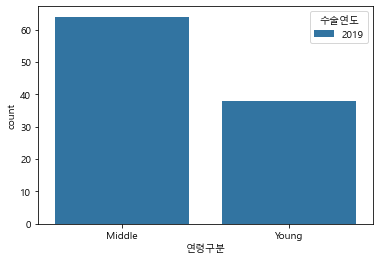

In [647]:
sns.countplot(data = df.loc[(df['재발여부'] == 1) & df['수술연도'].isin([2018, 2019])], x = '연령구분', hue = '수술연도')

In [ ]:
# 2018년의 젊은 환자 비율과 2019년의 젊은 환자 비율

In [654]:
ct = df.pivot_table(index = '연령구분', values = '환자ID', columns = '수술연도', aggfunc='count', margins = True)
ct

수술연도,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
연령구분,,,,,,,,,,,,,
Middle,38.0,22.0,89.0,85.0,42.0,51.0,39.0,59.0,45.0,2.0,458.0,100.0,1030
Young,62.0,45.0,113.0,63.0,26.0,46.0,35.0,41.0,33.0,NaN,309.0,82.0,855
All,100.0,67.0,202.0,148.0,68.0,97.0,74.0,100.0,78.0,2.0,767.0,182.0,1885


In [ ]:
# 2017년 young : 42.31%
# 2019년 young : 40.29%
# 2020년 young : 45%

In [668]:
cond1 = (df['수술연도'].isin([2019, 2020]))
cond2 = (df['직업'].isin(['학생', '사무직']))

df1920sit = df.loc[cond1 & cond2]

In [669]:
df1920sit.pivot_table(index = '연령구분', values = '환자ID', columns = '수술연도', aggfunc='count', margins = True)

수술연도,2019,2020,All
연령구분,,,
Middle,227,53,280
Young,201,55,256
All,428,108,536


In [ ]:
# 2019 46.96%
# 2020 50.96%

In [651]:
df.loc[(df['재발여부'] == 1)]['수술연도'].value_counts()

2019    102
2020     19
2011     18
2016     18
2012     16
2017     13
2014     12
2013     10
2009      8
2015      8
2010      3
Name: 수술연도, dtype: int64

In [641]:
df['재발여부'].value_counts()

0    1658
1     227
Name: 재발여부, dtype: int64

In [702]:
df.loc[(df['BMI'] < 23), '비만여부'] = '정상'
df.loc[(df['BMI'] >= 23), '비만여부'] = '비만'

In [710]:
df_fat = df[['환자ID', '비만여부', '수술연도', '재발여부']]
df_fat

,환자ID,비만여부,수술연도,재발여부
0,1PT,정상,2019,0
1,2PT,비만,2019,0
2,3PT,비만,2019,0
3,4PT,비만,2019,0
4,5PT,비만,2019,0
...,...,...,...,...
1880,1890PT,비만,2017,0
1881,1891PT,비만,2017,0
1882,1892PT,비만,2017,0
1883,1893PT,비만,2017,0


In [719]:
df_fat_pivot = df_fat.loc[df_fat['수술연도'].isin([2019, 2020])].pivot_table(index = '수술연도', values = '환자ID', columns = '비만여부', aggfunc = 'count', margins = True).reset_index()
df_fat_pivot

비만여부,수술연도,비만,정상,All
0,2019,596,171,767
1,2020,133,49,182
2,All,729,220,949


In [739]:
ct = df.pivot_table(index = '재발여부', values = '환자ID', columns = '흡연여부', aggfunc='count', margins=True)
ct

흡연여부,0,1,All
재발여부,,,
0,1344,314,1658
1,132,95,227
All,1476,409,1885


In [738]:
stats.chi2_contingency(ct)[1]

7.937559060070907e-15

In [742]:
count = np.array([95, 132])
nob = np.array([409, 1476])

stat, pval = proportions_ztest(count, nob)
print(stat)
print(pval)

7.854419839382835
4.016268387502275e-15


In [754]:
df_dia_pivot = df.pivot_table(index = '재발여부', values = '환자ID', columns = '당뇨여부', aggfunc = 'count', margins = True)
df_dia_pivot

당뇨여부,0,1,All
재발여부,,,
0,1579,79,1658
1,187,40,227
All,1766,119,1885


In [755]:
count = np.array([187, 40])
nob = np.array([1766, 119])

stat, pval = proportions_ztest(count, nob)
print(stat)
print(pval)

-7.469823700037672
8.030233537118941e-14


In [746]:
df_dia = df[['환자ID', '당뇨여부', '수술연도', '재발여부']]
df_dia

,환자ID,당뇨여부,수술연도,재발여부
0,1PT,0,2019,0
1,2PT,0,2019,0
2,3PT,0,2019,0
3,4PT,0,2019,0
4,5PT,0,2019,0
...,...,...,...,...
1880,1890PT,0,2017,0
1881,1891PT,0,2017,0
1882,1892PT,0,2017,0
1883,1893PT,0,2017,0


In [749]:
df_dia.loc[df_dia['수술연도'].isin([2019, 2020])].pivot_table(index = '수술연도', values = '환자ID', columns = '당뇨여부', aggfunc = 'count', margins = True)

당뇨여부,0,1,All
수술연도,,,
2019,722,45,767
2020,167,15,182
All,889,60,949


In [747]:
2019년 비만 비율

SyntaxError: invalid syntax (Temp/ipykernel_284/1191879216.py, line 1)

<AxesSubplot:xlabel='수술연도', ylabel='환자ID'>

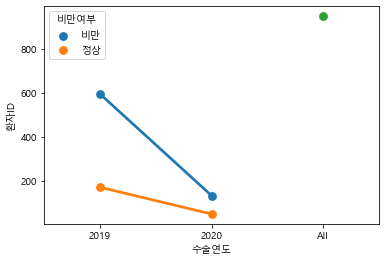

In [718]:
sns.pointplot(data = df_fat_pivot, x = '수술연도', y = '환자ID', hue = '비만여부')

<AxesSubplot:xlabel='수술연도', ylabel='count'>

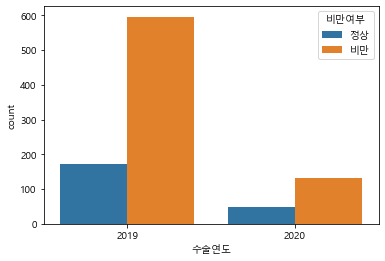

In [713]:
sns.countplot(data = df_fat.loc[df_fat['수술연도'].isin([2019, 2020])], x = '수술연도', hue = '비만여부')

<AxesSubplot:xlabel='입원월', ylabel='count'>

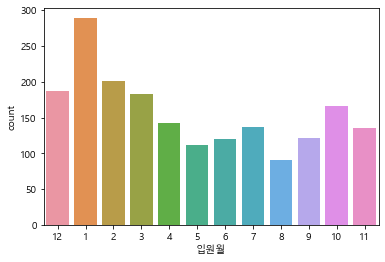

In [278]:
sns.countplot(data = df, x = '입원월', order = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [282]:
df2019 = df.loc[df['수술연도'] == 2019].sort_values(by = '수술일자(dt)').groupby('수술일자(dt)').count()

<AxesSubplot:xlabel='수술일자(dt)', ylabel='환자ID'>

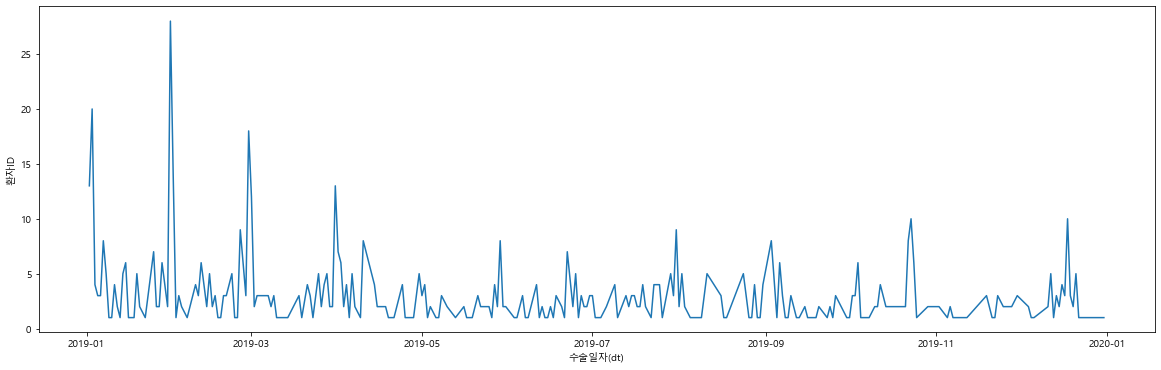

In [284]:
plt.figure(figsize = (20, 6))
sns.lineplot(data = df2019, x = '수술일자(dt)', y = '환자ID')

<AxesSubplot:xlabel='수술일자(dt)', ylabel='환자ID'>

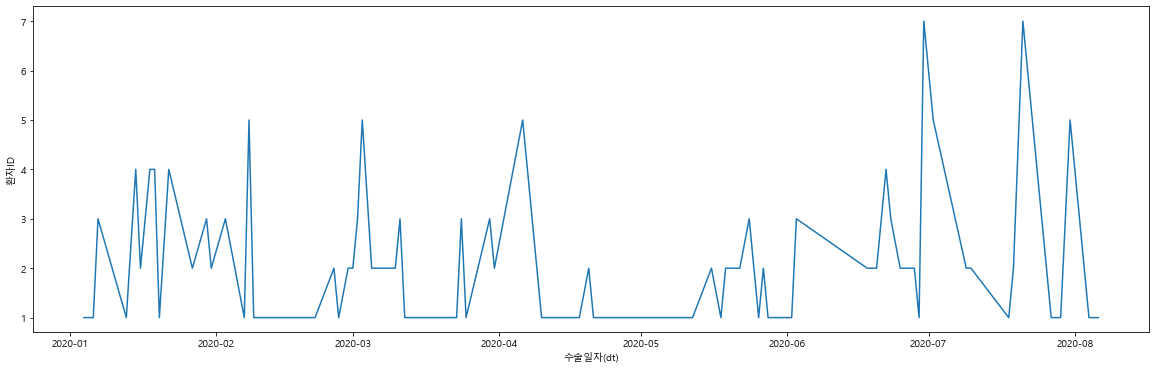

In [288]:
df2020 = df.loc[df['수술연도'] == 2020].sort_values(by = '수술일자(dt)').groupby('수술일자(dt)').count()
plt.figure(figsize = (20, 6))
sns.lineplot(data = df2020, x = '수술일자(dt)', y = '환자ID')

In [287]:
df.loc[df['수술연도'] == 2018].sort_values(by = '수술일자(dt)')

,환자ID,Large Lymphocyte,Location of herniation,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,수술일자(dt),수술연도,수술월,수술일,수술요일,퇴원일자(dt),퇴원연도,퇴원월,퇴원일,퇴원요일
1025,1031PT,15.8,3,0.0,0,1,2,0,0,0,...,2018-01-24,2018,1,24,Wednesday,2012-02-29,2012,2,29,Wednesday
1198,1205PT,42.6,4,0.0,0,0,1,0,0,0,...,2018-02-20,2018,2,20,Tuesday,2018-02-21,2018,2,21,Wednesday


In [342]:
df.loc[(df['성별'] == 2) & (df['연령대'] == '60대')]['수술실패여부'].value_counts()

0    45
1     5
Name: 수술실패여부, dtype: int64

In [359]:
df['연령대'].value_counts()

40대    579
30대    467
20대    320
50대    272
60대    115
10대     68
70대     59
80대      5
Name: 연령대, dtype: int64

In [363]:
a = df.loc[(df['성별'] == 2) & (df['연령대'] == '80대')]['수술실패여부'].value_counts()
print('80대 여성 수술 실패', a[1] / (a[0] + a[1]) * 100, '%')

KeyError: 1

In [357]:
a = df.loc[(df['성별'] == 2) & (df['연령대'] == '70대')]['수술실패여부'].value_counts()
print('70대 여성 수술 실패', a[1] / (a[0] + a[1]) * 100, '%')

70대 여성 수술 실패 3.4482758620689653 %


In [344]:
a = df.loc[(df['성별'] == 2) & (df['연령대'] == '60대')]['수술실패여부'].value_counts()
print('60대 여성 수술 실패', a[1] / (a[0] + a[1]) * 100, '%')

60대 여성 수술 실패 10.0 %


In [345]:
a = df.loc[(df['성별'] == 2) & (df['연령대'] == '50대')]['수술실패여부'].value_counts()
print('50대 여성 수술 실패', a[1] / (a[0] + a[1]) * 100, '%')

50대 여성 수술 실패 7.758620689655173 %


In [346]:
a = df.loc[(df['성별'] == 2) & (df['연령대'] == '40대')]['수술실패여부'].value_counts()
print('40대 여성 수술 실패', a[1] / (a[0] + a[1]) * 100, '%')

40대 여성 수술 실패 5.607476635514018 %


In [347]:
a = df.loc[(df['성별'] == 2) & (df['연령대'] == '30대')]['수술실패여부'].value_counts()
print('30대 여성 수술 실패', a[1] / (a[0] + a[1]) * 100, '%')

30대 여성 수술 실패 2.247191011235955 %


In [348]:
a = df.loc[(df['성별'] == 2) & (df['연령대'] == '20대')]['수술실패여부'].value_counts()
print('20대 여성 수술 실패', a[1] / (a[0] + a[1]) * 100, '%')

20대 여성 수술 실패 2.7522935779816518 %


In [349]:
a = df.loc[(df['성별'] == 1) & (df['연령대'] == '60대')]['수술실패여부'].value_counts()
print('60대 남성 수술 실패', a[1] / (a[0] + a[1]) * 100, '%')

60대 남성 수술 실패 9.230769230769232 %


In [356]:
a = df.loc[(df['성별'] == 1) & (df['연령대'] == '50대')]['수술실패여부'].value_counts()
print('50대 남성 수술 실패', a[1] / (a[0] + a[1]) * 100, '%')

50대 남성 수술 실패 8.974358974358974 %


In [355]:
a = df.loc[(df['성별'] == 1) & (df['연령대'] == '40대')]['수술실패여부'].value_counts()
print('40대 남성 수술 실패', a[1] / (a[0] + a[1]) * 100, '%')

40대 남성 수술 실패 6.8493150684931505 %


In [354]:
a = df.loc[(df['성별'] == 1) & (df['연령대'] == '30대')]['수술실패여부'].value_counts()
print('30대 남성 수술 실패', a[1] / (a[0] + a[1]) * 100, '%')

30대 남성 수술 실패 8.304498269896193 %


In [353]:
a = df.loc[(df['성별'] == 1) & (df['연령대'] == '20대')]['수술실패여부'].value_counts()
print('20대 남성 수술 실패', a[1] / (a[0] + a[1]) * 100, '%')

20대 남성 수술 실패 2.3696682464454977 %


In [336]:
df.loc[(df['성별'] == 1) & (df['연령대'] == '10대')]['수술실패여부'].value_counts()

0    41
1     4
Name: 수술실패여부, dtype: int64

In [323]:
df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', '가족력', '간질성폐질환',
       '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부',
       '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간', '입원일자', '종양진행여부', '직업',
       '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)', '수술기법',
       '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형', '전방디스크높이(mm)', '후방디스크높이(mm)',
       '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI', 'PT',
       'Seg Angle(raw)', 'Vaccum disc', '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증',
       '연령대', 'BMI', '디스크높이차(mm)', '비만정도', '입원일자(dt)', '입원연도', '입원월', '입원일',
       '입원요일', '수술일자(dt)', '수술연도', '수술월', '수술일', '수술요일', '퇴원일자(dt)', '퇴원연도',
       '퇴원월', '퇴원일', '퇴원요일'],
      dtype='object')

In [329]:
df.loc[(df['스테로이드치료'] == 1) & (df['수술실패여부'] == 1)]['통증기간(월)']

9        1.0
20       1.0
62       3.0
67       1.0
128      2.0
133      1.0
147      1.0
254      2.0
308      2.0
346      1.0
349      1.0
408      2.0
451      1.0
477      1.0
535      1.0
551      1.0
565      1.0
570      3.0
583      3.0
596      1.0
601      1.0
651      1.0
678      2.0
700      2.0
722      1.0
776      1.0
817      2.0
840      3.0
971      0.2
974      4.0
975     12.0
991      0.5
1067     2.0
1070     2.0
1073     1.0
1107     2.0
1108     2.0
1109     2.0
1112     3.0
1134    60.0
1151     2.0
1170     2.0
1240    24.0
1316     2.0
1344    36.0
1379    12.0
1385     5.0
1455    15.0
1458     1.5
1476     2.0
1492    12.0
1585     1.0
1615     8.0
1661     3.0
1690     2.0
1746     1.0
1749     3.0
1757     2.0
1810     1.5
Name: 통증기간(월), dtype: float64

In [316]:
df['연령대']

0       60대
1       40대
2       30대
3       40대
4       40대
       ... 
1880    50대
1881    40대
1882    60대
1883    20대
1884    30대
Name: 연령대, Length: 1885, dtype: object

In [319]:
df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', '가족력', '간질성폐질환',
       '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부',
       '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간', '입원일자', '종양진행여부', '직업',
       '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)', '수술기법',
       '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형', '전방디스크높이(mm)', '후방디스크높이(mm)',
       '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI', 'PT',
       'Seg Angle(raw)', 'Vaccum disc', '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증',
       '연령대', 'BMI', '디스크높이차(mm)', '비만정도', '입원일자(dt)', '입원연도', '입원월', '입원일',
       '입원요일', '수술일자(dt)', '수술연도', '수술월', '수술일', '수술요일', '퇴원일자(dt)', '퇴원연도',
       '퇴원월', '퇴원일', '퇴원요일'],
      dtype='object')

In [386]:
df_pivot = df.pivot_table(index = ['연령대', '재발여부'], values = '환자ID', aggfunc = 'count').reset_index().rename(columns = {'환자ID': '환자수'})
df_pivot

,연령대,재발여부,환자수
0,10대,0,65
1,10대,1,3
2,20대,0,290
3,20대,1,30
4,30대,0,410
5,30대,1,57
6,40대,0,499
7,40대,1,80
8,50대,0,239
9,50대,1,33


In [455]:
df['재발여부'].value_counts()

0    1658
1     227
Name: 재발여부, dtype: int64

In [456]:
227 / (1658 + 227) * 100

12.042440318302388

In [493]:
for i in ['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대']:
    a = df.loc[(df['연령대'] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, '재발 0%', '\t전체환자수: ', len(a))
    else:
        print(i, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

10대 재발 4.41 % 	전체환자수:  68
20대 재발 9.38 % 	전체환자수:  320
30대 재발 12.21 % 	전체환자수:  467
40대 재발 13.82 % 	전체환자수:  579
50대 재발 12.13 % 	전체환자수:  272
60대 재발 12.17 % 	전체환자수:  115
70대 재발 15.25 % 	전체환자수:  59
80대 재발 20.0 % 	전체환자수:  5


In [453]:
for i in ['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대']:
    a = df.loc[(df['성별'] == 1) & (df['연령대'] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, '남성 재발 0%', '\t전체환자수: ', len(a))
    else:
        print(i, '남성 재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

10대 남성 재발 0% 	전체환자수:  45
20대 남성 재발 9.48 % 	전체환자수:  211
30대 남성 재발 13.49 % 	전체환자수:  289
40대 남성 재발 15.89 % 	전체환자수:  365
50대 남성 재발 14.1 % 	전체환자수:  156
60대 남성 재발 18.46 % 	전체환자수:  65
70대 남성 재발 16.67 % 	전체환자수:  30
80대 남성 재발 0% 	전체환자수:  1


In [454]:
for i in ['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대']:
    a = df.loc[(df['성별'] == 2) & (df['연령대'] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, '여성 재발 0%', '\t전체환자수: ', len(a))
    else:
        print(i, '여성 재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

10대 여성 재발 13.04 % 	전체환자수:  23
20대 여성 재발 9.17 % 	전체환자수:  109
30대 여성 재발 10.11 % 	전체환자수:  178
40대 여성 재발 10.28 % 	전체환자수:  214
50대 여성 재발 9.48 % 	전체환자수:  116
60대 여성 재발 4.0 % 	전체환자수:  50
70대 여성 재발 13.79 % 	전체환자수:  29
80대 여성 재발 25.0 % 	전체환자수:  4


In [426]:
sex = '남성'
for i in ['정상', '과체중', '경도비만', '중등도비만', '저체중', '고도비만']:
    a = df.loc[(df['성별'] == 1) & (df['비만정도'] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(sex, i, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(sex, i, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))
print('')        
sex = '여성'
for i in ['정상', '과체중', '경도비만', '중등도비만', '저체중', '고도비만']:
    a = df.loc[(df['성별'] == 2) & (df['비만정도'] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(sex, i, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(sex, i, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))        

남성 정상 재발 8.76 % 	전체환자수:  251
남성 과체중 재발 10.19 % 	전체환자수:  589
남성 경도비만 재발 18.96 % 	전체환자수:  269
남성 중등도비만 재발 50.0 % 	전체환자수:  44
남성 저체중 재발 0% 		전체환자수:  8
남성 고도비만 재발 0% 		전체환자수:  1

여성 정상 재발 7.64 % 	전체환자수:  314
여성 과체중 재발 10.92 % 	전체환자수:  229
여성 경도비만 재발 10.61 % 	전체환자수:  132
여성 중등도비만 재발 14.29 % 	전체환자수:  14
여성 저체중 재발 10.0 % 	전체환자수:  30
여성 고도비만 재발 75.0 % 	전체환자수:  4


In [425]:
sex = '남성'
print('흡연여부')
for i in [0, 1]:
    a = df.loc[(df['성별'] == 1) & (df['흡연여부'] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

sex = '여성'
print('')
for i in [0, 1]:
    a = df.loc[(df['성별'] == 2) & (df['흡연여부'] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

흡연여부
0 남성 재발 10.26 % 	전체환자수:  848
1 남성 재발 21.97 % 	전체환자수:  314

0 여성 재발 7.17 % 	전체환자수:  628
1 여성 재발 27.37 % 	전체환자수:  95


In [428]:
col = '당뇨여부'
sex = '남성'

print(col)
for i in [0, 1]:
    a = df.loc[(df['성별'] == 1) & (df[col] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

sex = '여성'
print('')
for i in [0, 1]:
    a = df.loc[(df['성별'] == 2) & (df[col] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

당뇨여부
0 남성 재발 11.69 % 	전체환자수:  1086
1 남성 재발 38.16 % 	전체환자수:  76

0 여성 재발 8.82 % 	전체환자수:  680
1 여성 재발 25.58 % 	전체환자수:  43


In [429]:
col = '고혈압여부'
sex = '남성'

print(col)
for i in [0, 1]:
    a = df.loc[(df['성별'] == 1) & (df[col] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

sex = '여성'
print('')
for i in [0, 1]:
    a = df.loc[(df['성별'] == 2) & (df[col] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

고혈압여부
0 남성 재발 11.79 % 	전체환자수:  1009
1 남성 재발 24.18 % 	전체환자수:  153

0 여성 재발 9.87 % 	전체환자수:  628
1 여성 재발 9.47 % 	전체환자수:  95


In [430]:
col = '스테로이드치료'
sex = '남성'

print(col)
for i in [0, 1]:
    a = df.loc[(df['성별'] == 1) & (df[col] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

sex = '여성'
print('')
for i in [0, 1]:
    a = df.loc[(df['성별'] == 2) & (df[col] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

스테로이드치료
0 남성 재발 12.91 % 	전체환자수:  457
1 남성 재발 13.76 % 	전체환자수:  705

0 여성 재발 12.08 % 	전체환자수:  298
1 여성 재발 8.24 % 	전체환자수:  425


In [449]:
col = '디스크높이차(mm)'
sex = '남성'

print(col)
a = df.loc[(df['성별'] == 1) & (df[col] >= 0)]['재발여부']
b = a.value_counts()
if len(b) == 1:
    print('전방>후방', sex, '재발 0%', '\t\t전체환자수: ', len(a))
else:
    print('전방>후방', sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

sex = '여성'
print('')
a = df.loc[(df['성별'] == 1) & (df[col] < 0)]['재발여부']
b = a.value_counts()
if len(b) == 1:
    print('전방<후방', sex, '재발 0%', '\t\t전체환자수: ', len(a))
else:
    print('전방<후방', sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

디스크높이차(mm)
전방>후방 남성 재발 13.95 % 	전체환자수:  1061

전방<후방 여성 재발 7.92 % 	전체환자수:  101


In [450]:
col = '척추전방위증'
sex = '남성'

print(col)
for i in [0, 1]:
    a = df.loc[(df['성별'] == 1) & (df[col] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

sex = '여성'
print('')
for i in [0, 1]:
    a = df.loc[(df['성별'] == 2) & (df[col] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

척추전방위증
0 남성 재발 13.68 % 	전체환자수:  1126
1 남성 재발 5.56 % 	전체환자수:  36

0 여성 재발 9.89 % 	전체환자수:  698
1 여성 재발 8.0 % 	전체환자수:  25


In [457]:
col = '말초동맥질환여부'
sex = '남성'

print(col)
for i in [0, 1]:
    a = df.loc[(df['성별'] == 1) & (df[col] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

sex = '여성'
print('')
for i in [0, 1]:
    a = df.loc[(df['성별'] == 2) & (df[col] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

말초동맥질환여부
0 남성 재발 13.37 % 	전체환자수:  1159
1 남성 재발 33.33 % 	전체환자수:  3

0 여성 재발 9.75 % 	전체환자수:  718
1 여성 재발 20.0 % 	전체환자수:  5


In [458]:
col = '과거수술횟수'
sex = '남성'
llist = [0, 1, 2, 3]
print(col)
for i in llist:
    a = df.loc[(df['성별'] == 1) & (df[col] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

sex = '여성'
print('')
for i in llist:
    a = df.loc[(df['성별'] == 2) & (df[col] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

과거수술횟수
0 남성 재발 12.64 % 	전체환자수:  910
1 남성 재발 16.91 % 	전체환자수:  136
2 남성 재발 15.45 % 	전체환자수:  110
3 남성 재발 16.67 % 	전체환자수:  6

0 여성 재발 9.11 % 	전체환자수:  582
1 여성 재발 11.36 % 	전체환자수:  88
2 여성 재발 15.69 % 	전체환자수:  51
3 여성 재발 0% 		전체환자수:  2


In [463]:
col = '심혈관질환'
sex = '남성'
llist = [0, 1]
print(col)
for i in llist:
    a = df.loc[(df['성별'] == 1) & (df[col] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

sex = '여성'
print('')
for i in llist:
    a = df.loc[(df['성별'] == 2) & (df[col] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

심혈관질환
0 남성 재발 13.1 % 	전체환자수:  1122
1 남성 재발 22.5 % 	전체환자수:  40

0 여성 재발 9.5 % 	전체환자수:  695
1 여성 재발 17.86 % 	전체환자수:  28


In [468]:
col = '직업'
sex = '남성'
llist = ['자영업', '운동선수', '특수전문직', '주부', '사업가', '사무직', '무직', '건설업', '운수업',
       '공무원', '농업', '의료직', '학생', '군인', '노동직', '교사', '예술가']
print(col)
for i in llist:
    a = df.loc[(df['성별'] == 1) & (df[col] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

sex = '여성'
print('')
for i in llist:
    a = df.loc[(df['성별'] == 2) & (df[col] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

직업
자영업 남성 재발 19.64 % 	전체환자수:  112
운동선수 남성 재발 23.08 % 	전체환자수:  13
특수전문직 남성 재발 5.56 % 	전체환자수:  18
주부 남성 재발 2.56 % 	전체환자수:  39
사업가 남성 재발 14.81 % 	전체환자수:  27
사무직 남성 재발 14.62 % 	전체환자수:  465
무직 남성 재발 16.83 % 	전체환자수:  101
건설업 남성 재발 25.0 % 	전체환자수:  16
운수업 남성 재발 10.26 % 	전체환자수:  39
공무원 남성 재발 20.0 % 	전체환자수:  35
농업 남성 재발 10.34 % 	전체환자수:  29
의료직 남성 재발 22.73 % 	전체환자수:  22
학생 남성 재발 4.92 % 	전체환자수:  122
군인 남성 재발 4.05 % 	전체환자수:  74
노동직 남성 재발 16.67 % 	전체환자수:  30
교사 남성 재발 25.0 % 	전체환자수:  12
예술가 남성 재발 0% 		전체환자수:  8

자영업 여성 재발 11.86 % 	전체환자수:  59
운동선수 여성 재발 0% 		전체환자수:  1
특수전문직 여성 재발 0% 		전체환자수:  5
주부 여성 재발 10.67 % 	전체환자수:  75
사업가 여성 재발 8.33 % 	전체환자수:  12
사무직 여성 재발 11.03 % 	전체환자수:  281
무직 여성 재발 8.87 % 	전체환자수:  124
건설업 여성 재발 0% 		전체환자수:  1
운수업 여성 재발 0% 		전체환자수:  11
공무원 여성 재발 12.5 % 	전체환자수:  16
농업 여성 재발 9.09 % 	전체환자수:  11
의료직 여성 재발 11.11 % 	전체환자수:  18
학생 여성 재발 6.56 % 	전체환자수:  61
군인 여성 재발 6.25 % 	전체환자수:  16
노동직 여성 재발 0% 		전체환자수:  12
교사 여성 재발 16.67 % 	전체환자수:  18
예술가 여성 재발 0% 		전체환자수:  2


In [469]:
col = '혈전합병증여부'
sex = '남성'
llist = [0, 1]
print(col)
for i in llist:
    a = df.loc[(df['성별'] == 1) & (df[col] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

sex = '여성'
print('')
for i in llist:
    a = df.loc[(df['성별'] == 2) & (df[col] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

혈전합병증여부
0 남성 재발 13.29 % 	전체환자수:  1159
1 남성 재발 66.67 % 	전체환자수:  3

0 여성 재발 9.83 % 	전체환자수:  722
1 여성 재발 0% 		전체환자수:  1


In [471]:
col = '척추이동척도'
sex = '남성'
llist = ['Down', 'Up', 'Middle', 'Extremely down', 'Extremely up']
print(col)
for i in llist:
    a = df.loc[(df['성별'] == 1) & (df[col] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

sex = '여성'
print('')
for i in llist:
    a = df.loc[(df['성별'] == 2) & (df[col] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

척추이동척도
Down 남성 재발 13.16 % 	전체환자수:  304
Up 남성 재발 20.41 % 	전체환자수:  49
Middle 남성 재발 13.03 % 	전체환자수:  775
Extremely down 남성 재발 20.83 % 	전체환자수:  24
Extremely up 남성 재발 0% 		전체환자수:  10

Down 여성 재발 9.13 % 	전체환자수:  208
Up 여성 재발 12.5 % 	전체환자수:  16
Middle 여성 재발 10.27 % 	전체환자수:  477
Extremely down 여성 재발 6.25 % 	전체환자수:  16
Extremely up 여성 재발 0% 		전체환자수:  6


In [476]:
col = 'Vaccum disc'
sex = '남성'
llist = [0, 1]
print(col)
for i in llist:
    a = df.loc[(df['성별'] == 1) & (df[col] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

sex = '여성'
print('')
for i in llist:
    a = df.loc[(df['성별'] == 2) & (df[col] == i)]['재발여부']
    b = a.value_counts()
    if len(b) == 1:
        print(i, sex, '재발 0%', '\t\t전체환자수: ', len(a))
    else:
        print(i, sex, '재발', (b[1] / (b[0] + b[1]) * 100).round(2), '%', '\t전체환자수: ', len(a))

Vaccum disc
0 남성 재발 13.24 % 	전체환자수:  1110
1 남성 재발 17.31 % 	전체환자수:  52

0 여성 재발 9.43 % 	전체환자수:  668
1 여성 재발 14.55 % 	전체환자수:  55


In [415]:
df.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', '가족력', '간질성폐질환',
       '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부',
       '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간', '입원일자', '종양진행여부', '직업',
       '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)', '수술기법',
       '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형', '전방디스크높이(mm)', '후방디스크높이(mm)',
       '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI', 'PT',
       'Seg Angle(raw)', 'Vaccum disc', '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증',
       '연령대', 'BMI', '디스크높이차(mm)', '비만정도', '입원일자(dt)', '입원연도', '입원월', '입원일',
       '입원요일', '수술일자(dt)', '수술연도', '수술월', '수술일', '수술요일', '퇴원일자(dt)', '퇴원연도',
       '퇴원월', '퇴원일', '퇴원요일'],
      dtype='object')

In [475]:
df['Vaccum disc'].unique()

array([0, 1], dtype=int64)

In [441]:
df['디스크높이차반올림'] = round(df['디스크높이차(mm)'], 0)

In [446]:
df['디스크높이차반올림'].unique()

array([  4.,   7.,   6.,   3.,   9.,   2.,   8.,   5.,   1.,  10.,   0.,
        14.,  -1.,  -3.,  -2., -89.,  -6.,  -4.,  -5.,  -7.,  13.,  11.])

In [ ]:
지방축적도, 헤모글로빈수치, 디스크단면적, 진공디스크, mf+es, 척추이동척도

In [477]:
# 동일성검정

In [479]:
ct = pd.crosstab(df['재발여부'], df['당뇨여부'])
ct

당뇨여부,0,1
재발여부,,
0,1579,79
1,187,40


In [481]:
stats.chi2_contingency(ct)[1]

2.4010649783093576e-13

In [482]:
df_f = df.loc[df['성별'] == 2]
df_f

,환자ID,Large Lymphocyte,Location of herniation,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,수술연도,수술월,수술일,수술요일,퇴원일자(dt),퇴원연도,퇴원월,퇴원일,퇴원요일,디스크높이차반올림
0,1PT,22.8,3,0.0,0,0,0,0,0,0,...,2019,7,15,Monday,2019-07-16,2019,7,16,Tuesday,4.0
5,6PT,28.5,3,0.0,0,0,2,0,1,0,...,2019,9,7,Saturday,2019-09-07,2019,9,7,Saturday,2.0
10,11PT,31.8,3,0.0,0,0,0,0,0,0,...,2019,12,19,Thursday,2019-12-19,2019,12,19,Thursday,3.0
14,15PT,32.1,3,0.0,0,0,0,0,0,0,...,2019,6,20,Thursday,2019-06-20,2019,6,20,Thursday,6.0
19,20PT,39.2,3,0.0,0,0,0,0,0,0,...,2019,2,27,Wednesday,2019-02-27,2019,2,27,Wednesday,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,1887PT,49.9,2,0.0,0,0,0,0,0,0,...,2017,4,28,Friday,2017-04-29,2017,4,29,Saturday,5.0
1878,1888PT,49.9,2,0.0,0,0,1,0,0,0,...,2017,7,7,Friday,2017-07-08,2017,7,8,Saturday,6.0
1880,1890PT,44.0,1,0.0,0,0,0,0,0,0,...,2017,4,7,Friday,2017-04-08,2017,4,8,Saturday,6.0
1881,1891PT,30.8,2,0.0,0,0,0,0,0,0,...,2017,4,27,Thursday,2017-04-29,2017,4,29,Saturday,1.0


In [483]:
df_m = df.loc[df['성별'] == 1]
df_m

,환자ID,Large Lymphocyte,Location of herniation,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,수술연도,수술월,수술일,수술요일,퇴원일자(dt),퇴원연도,퇴원월,퇴원일,퇴원요일,디스크높이차반올림
1,2PT,44.9,4,0.0,0,0,0,0,0,0,...,2019,7,16,Tuesday,2019-07-16,2019,7,16,Tuesday,7.0
2,3PT,53.0,3,0.0,0,0,1,0,0,0,...,2019,7,31,Wednesday,2019-08-01,2019,8,1,Thursday,6.0
3,4PT,54.7,4,0.0,0,1,0,0,0,0,...,2019,8,2,Friday,2019-08-03,2019,8,3,Saturday,3.0
4,5PT,53.8,4,0.0,0,1,0,0,0,0,...,2019,9,6,Friday,2019-09-07,2019,9,7,Saturday,9.0
6,7PT,4.2,3,0.0,0,0,0,1,0,0,...,2019,6,25,Tuesday,2019-06-26,2019,6,26,Wednesday,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,1884PT,25.4,3,0.0,0,1,0,0,0,0,...,2017,3,30,Thursday,2017-03-31,2017,3,31,Friday,3.0
1876,1886PT,36.6,1,0.0,0,0,0,0,0,0,...,2017,4,4,Tuesday,2017-04-10,2017,4,10,Monday,5.0
1879,1889PT,42.4,3,0.0,0,0,0,0,0,0,...,2017,5,11,Thursday,2017-05-13,2017,5,13,Saturday,3.0
1882,1892PT,36.7,3,0.0,0,0,0,0,1,0,...,2017,4,11,Tuesday,2017-04-12,2017,4,12,Wednesday,8.0


In [485]:
# 여성 당뇨

ct = pd.crosstab(df_f['재발여부'], df_f['당뇨여부'])
stats.chi2_contingency(ct)[1]

# 여성 당뇨 유무별로 재발 빈도 차이가 있당. 

0.0009100364486411933

In [486]:
ct = pd.crosstab(df_m['재발여부'], df_m['당뇨여부'])
stats.chi2_contingency(ct)[1]

1.9149613361322052e-10

In [490]:
col = '고혈압여부'

ct = pd.crosstab(df_f['재발여부'], df_f[col])
print('여성 p value', stats.chi2_contingency(ct)[1])

ct = pd.crosstab(df_m['재발여부'], df_m[col])
print('남성 p value', stats.chi2_contingency(ct)[1])

여성 p value 1.0
남성 p value 4.8776284509067606e-05


In [491]:
col = '연령대'

ct = pd.crosstab(df_f['재발여부'], df_f[col])
print('여성 p value', stats.chi2_contingency(ct)[1])

ct = pd.crosstab(df_m['재발여부'], df_m[col])
print('남성 p value', stats.chi2_contingency(ct)[1])

여성 p value 0.7940966975651986
남성 p value 0.05833229274860735


In [492]:
ct

연령대,10대,20대,30대,40대,50대,60대,70대,80대
재발여부,,,,,,,,
0,45,191,250,307,134,53,25,1
1,0,20,39,58,22,12,5,0


In [756]:
df.pivot_table(index = '재발여부', values = '환자ID', columns = '직업', aggfunc='count', margins=True)

직업,건설업,공무원,교사,군인,노동직,농업,무직,사무직,사업가,예술가,운동선수,운수업,의료직,자영업,주부,특수전문직,학생,All
재발여부,,,,,,,,,,,,,,,,,,
0,13.0,42.0,24.0,86.0,37.0,36.0,197.0,647.0,34.0,10.0,11.0,46.0,33.0,142.0,105.0,22.0,173.0,1658
1,4.0,9.0,6.0,4.0,5.0,4.0,28.0,99.0,5.0,NaN,3.0,4.0,7.0,29.0,9.0,1.0,10.0,227
All,17.0,51.0,30.0,90.0,42.0,40.0,225.0,746.0,39.0,10.0,14.0,50.0,40.0,171.0,114.0,23.0,183.0,1885


In [757]:
109 / 227

0.4801762114537445